In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

# Task1

Решим уравнение
$1 + cosx = 0$
с помощью метода простой итерации
$x_{k+1} = x_k + \frac{cos(x_k) + 1}{sin(x_k)}$

In [4]:
def simple_iter(x):
    return x + (np.cos(x) + 1)/np.sin(x)

In [6]:
n = 10
x = np.zeros(n)
x[0] = 1
for i in range(1, n):
    x[i] = simple_iter(x[i-1])
x

array([1.        , 2.83048772, 2.98730706, 3.06460325, 3.10311698,
       3.12235719, 3.13197522, 3.13678397, 3.13918832, 3.14039049])

Построим ошибку

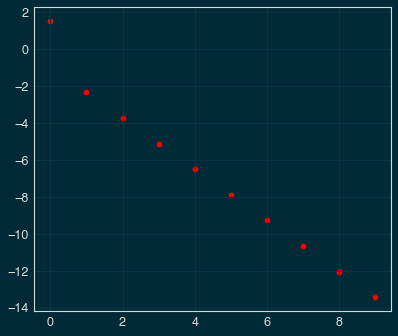

In [25]:
jtplot.style(theme='solarizedd')
plt.scatter(range(n), np.log((x - np.pi)**2), color='red')
plt.show()

Видно, что сходимость линейнейная.

Теперт решим второе уравнени $$x^2 = 2$$ с помощью формулы 
$$x_{k+1} = \frac{1}{2}(x_k + \frac{2}{x_k})$$

In [26]:
def simple_iter(x):
    return 0.5*(x + 2/x)

In [27]:
n = 10
x = np.zeros(n)
x[0] = 1
for i in range(1, n):
    x[i] = simple_iter(x[i-1])
x

array([1.        , 1.5       , 1.41666667, 1.41421569, 1.41421356,
       1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356])

Построим ошибку

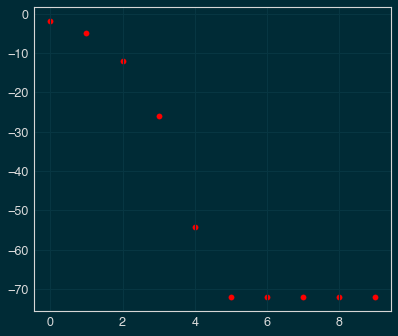

In [29]:
plt.scatter(range(n), np.log((x - 2**0.5)**2), color='red')
plt.show()

Видно, что зависимость не линейная, а скорее квадратичная.

# Task2

In [67]:
def simple_iteration(f, fder, x):
    return x - f(x)/fder(x)

def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Newton's root finding method for f(x)=0
    Parameters
    ----------
    f : callable
        Function f.
    fder : callable
        Derivative of f.
    x0 : float
        Initial point for iterations.
    eps : float
        Requested accuracy.
    maxiter : int
        Maximal number of iterations.
    
    Returns
    -------
    x : float
        Approximate root.
    niter : int
        Number of iterations.
    """
    x = [x0]
    x.append(simple_iteration(f, fder, x0))
    niter = 1
    while abs((x[niter] - x[niter-1])) > eps and (niter < maxiter):
        x.append(simple_iteration(f, fder, x[niter]))
        niter += 1
    return np.array(x), niter

In [68]:
def fun(x):
    return x**2 - 2
def dfun(x):
    return 2*x

In [69]:
x, itter = newton_iteration(fun, dfun, 2)

In [70]:
len(x), itter

(5, 4)

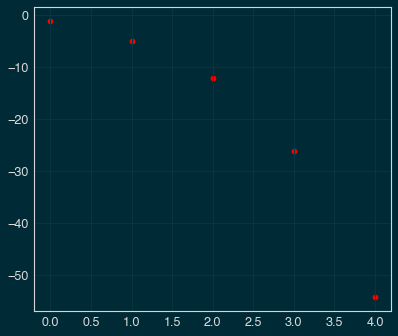

In [73]:
plt.scatter(range(len(x)), np.log((x - 2**0.5)**2), color='red')
plt.show()

Видно, что сходимость квадратичная.

# Task3

Сначала немного разберемся в sympy

In [2]:
import sympy

In [3]:
x1, x2 = sympy.symbols('x1 x2')

In [4]:
a1 = x1**2-2*x2**4 +1
a1

x1**2 - 2*x2**4 + 1

In [5]:
a2 = x1-x2**3 +1
a2

x1 - x2**3 + 1

In [6]:
f = sympy.Matrix([a1, a2])

In [7]:
J = f.jacobian(sympy.Matrix([x1, x2]))
J

Matrix([
[2*x1, -8*x2**3],
[   1, -3*x2**2]])

In [8]:
J

Matrix([
[2*x1, -8*x2**3],
[   1, -3*x2**2]])

In [26]:
J.subs({x1: 2, x2: 1}) #проверяем, все ли работает как надо

Matrix([
[4, -8],
[1, -3]])

In [10]:
np.array(J)

array([[2*x1, -8*x2**3],
       [1, -3*x2**2]], dtype=object)

In [11]:
Ji = J.inv()
Ji

Matrix([
[         3/(6*x1 - 8*x2),        -4*x2/(3*x1 - 4*x2)],
[1/(6*x1*x2**2 - 8*x2**3), -x1/(3*x1*x2**2 - 4*x2**3)]])

In [27]:
def simple_iteration(x0): #итерации через обратный якобиан
    return x0 - np.squeeze(np.array((Ji @ f).subs({x1: x0[0], x2: x0[1]})))

In [28]:
def iteration_solver(x0): #итерации через решение системы линейных уравнений
    M = np.array(J.subs({x1: x0[0], x2: x0[1]}), dtype='float32')
    b = np.squeeze(np.array(f.subs({x1: x0[0], x2: x0[1]}), dtype='float32'))
    return np.linalg.solve(M, - b) + x0

In [14]:
simple_iteration([0, 1])

array([-3/8, 7/8], dtype=object)

In [15]:
iteration_solver([0, 1])

array([-0.375,  0.875])

Проверили, что два метода дают один и тот же результат, но алгоритмы решения систем линейных уравнений более продвинутые, эффективные, поэтому будем пользоваться ими.

In [23]:
vec = []
x0 = [0, 1]
v0 = iteration_solver(x0)
vec.append(v0)
for i in range(10):
    vec.append(iteration_solver(vec[i]))

In [24]:
f.subs({x1: vec[-1][0], x2: vec[-1][1]})

Matrix([
[-4.44089209850063e-16],
[                    0]])

Мы действительно нашли решение

In [25]:
print('Решением системы:', vec[-1])

Решением системы: [-0.35119943  0.86570596]


# Task 4

Есть система уравнений $Ax = b$

Перепишем матрицу А в сумму диагональной и бездиагональной: $A = D + (A-D)$

Тогда уравнение можно переписать $Dx +Ax -Dx = b$

Или в итерационной форме

$x_{n+1} = D^{-1}(D-A)x{n} + D^{-1}b$

То есть в виде $x_{n+1} = Bx{n} + c$, где $B = D^{-1}(D-A), c = D^{-1}b$

P.S. 
Мне кажется в условии ошибка и в скобках должно быть D - A, а не наоборот.

In [29]:
rnd = np.random.RandomState(1234)
n = 10
A = rnd.uniform(size=(n, n)) + np.diag([15]*n)
b = rnd.uniform(size=n)

In [50]:
D = np.array([A[i,i] for i in range(len(A))])
B = np.diag(D**-1) @ (np.diag(D) - A)
c = np.diag(D**-1) @ b
print(np.linalg.norm(B))

0.36436161983015336


In [97]:
def iterations(B, c, epsilon=10**(-16)):
    x0 = np.ones(n)
    x = B @ x0 + c
    count = 1
    while (np.linalg.norm(x - x0) > epsilon) and count < 1000:
        x0 = x
        x = B @ x0 + c
        count += 1
    return x, count

In [90]:
x0, count = iterations(B, c)
x0, count

(array([ 0.03919429,  0.03780037,  0.04283232,  0.02365951,  0.05745031,
        -0.00030244, -0.00577279,  0.03177549, -0.00422849,  0.05284648]),
 33)

In [91]:
A @ x0 - b

array([-1.11022302e-16,  1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        0.00000000e+00, -1.11022302e-16, -9.71445147e-17, -1.11022302e-16,
       -9.71445147e-17,  0.00000000e+00])

Итерации сходятся, мы получаем правильный ответ.

Однако уже тут видно, что итерация нужно относительно много, что бы получить ответ с хорошей точностью.
Посмотрим, как будет вести себя сходимость, если мы будет делать матрицу менее диагонально выраженной.

In [104]:
numbers = []
norms = []
for i in range(15, 1, -1):
    A = rnd.uniform(size=(n, n)) + np.diag([i]*n)
    D = np.array([A[i,i] for i in range(len(A))])
    B = np.diag(D**-1) @ (np.diag(D) - A)
    c = np.diag(D**-1) @ b
    
    numbers.append(iterations(B, c)[1])
    norms.append(np.linalg.norm(B))

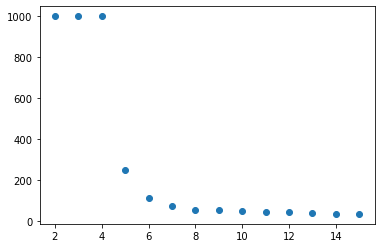

In [102]:
plt.scatter(range(15, 1, -1), numbers)
plt.show()

Видно, количество итерация для получения заданной точности растет экспоненциально, и уже когда средний модуль диагонального элемента отличается примерно в 4 раза нужно более 1000 итераций. Для вектора из 10-и элементов это слишклм много.

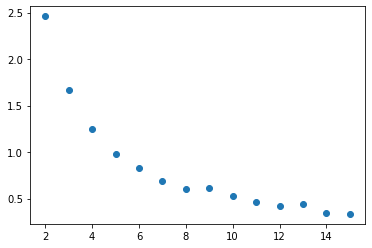

In [110]:
plt.scatter(range(15, 1, -1), norms)
plt.show()

Норма матрицы тоже растет экспоненциально. 